In [2]:
#matlab, packages 
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

#### guassian distribution data 

In [30]:
data = stats.norm.rvs(loc = 5., scale = 0.01, size = 100000)

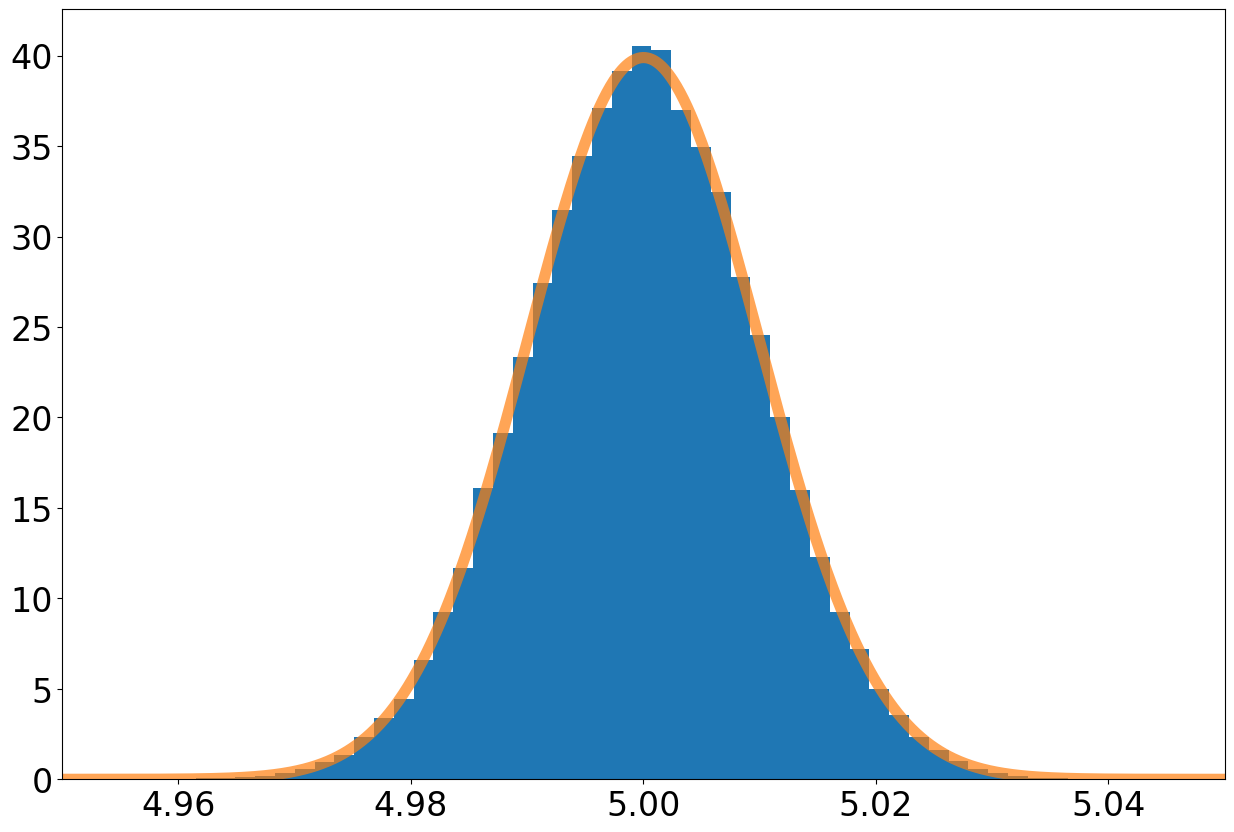

In [31]:
fig, ax = plt.subplots(1, 1)
#hist graph
ax.hist(data,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([4.95,5.05])
x = np.linspace(4.95,5.05,1000)
ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

In [32]:
p = stats.norm.cdf(data, data.mean(),data.std())

In [33]:
p1 = stats.norm.cdf(5.02, data.mean(),data.std())
p1

0.9778817124693278

In [34]:
sigma1 = stats.norm.ppf(p1)
sigma1

2.011842188996612

In [35]:
p2 = stats.norm.cdf(4.95, data.mean(),data.std())
p2

2.601367364760399e-07

In [36]:
sigma2 = stats.norm.ppf(p2)
sigma2

-5.018681415716939

#### Rayleigh distribution data 

In [12]:
data1 = stats.rayleigh.rvs(loc = 0., scale = 1, size = 100000)

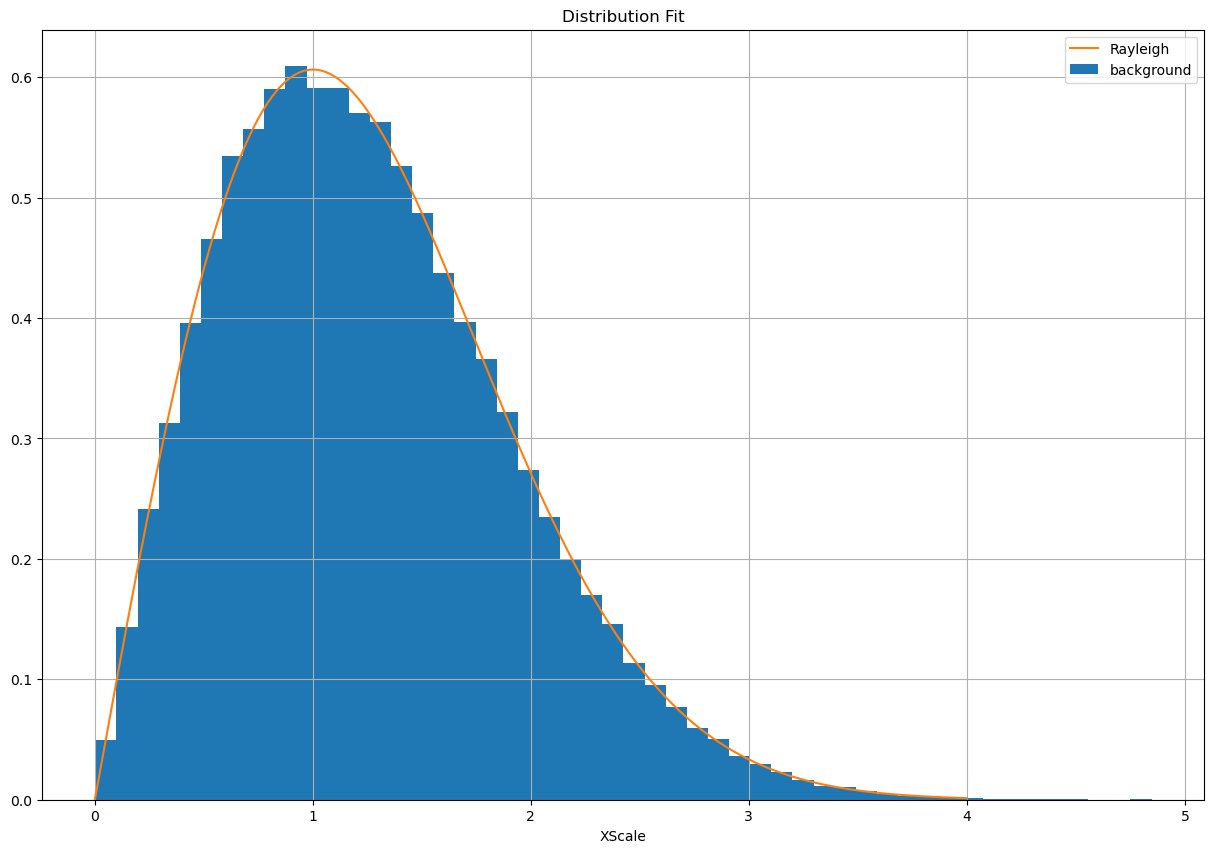

In [13]:
loc, scale = stats.rayleigh.fit(data1) 

# Tabulate over sample range (PDF display):
xl = np.linspace(0., 4.,1000)

# Display Results:
fig, ax = plt.subplots()

ax.hist(data1,50,density=1, label="background")

ax.plot(xl,stats.rayleigh(scale=scale, loc=loc).pdf(xl), label="Rayleigh")
ax.set_title("Distribution Fit")
ax.set_xlabel("XScale")

ax.legend()
ax.grid()

#### Select a value for your hypothetical measurement
My value would be 3.0

statistical question:
In scale of 0 to 4 grade, the probabilty to get a grade greater or equal to 3.0.

Therefore, the chance wuold be the area under the curve when x > 3. In other words, the chance would be the integral of the curve limit at 3 to infinity

In [27]:
p_above3 = stats.rayleigh.cdf(3.0)
p_above3

0.9888910034617577

In [28]:
#Z value
z_above3 = stats.norm.ppf(p_above3)
z_above3

2.286620338178611

In [29]:
p_value = stats.rayleigh.cdf(2.0)
z_value = stats.norm.ppf(p_value)
print(z_value,p_value)

1.1015196284987503 0.8646647167633873


In [31]:
p_value = stats.rayleigh.cdf(1.3)
z_value = stats.norm.ppf(p_value)
print(z_value,p_value)

0.1775012080401221 0.570442641789261


In [32]:
p_value = stats.rayleigh.cdf(0.5)
z_value = stats.norm.ppf(p_value)
print(z_value,p_value)

-1.1875615473802972 0.1175030974154046


In [33]:
p_value = stats.rayleigh.cdf(1.0)
z_value = stats.norm.ppf(p_value)
print(z_value,p_value)

-0.27028802073873587 0.3934693402873666


In [34]:
p_value = stats.rayleigh.cdf(1.1)
z_value = stats.norm.ppf(p_value)
print(z_value,p_value)

-0.11574940893789416 0.4539255733602906


#### Pattern

1. when the slope of the curve is positive, our z value would be positive and if the slope is negative, then the z-value would be nagetive too.
2. For positive values, as the probability goes up, z value would also go up. For Negative values, the pattern is the same as positive values.

## Non-continuous distributions - Poisson

1. Read up on the distributions
2. Make a series of plots with different parameters; and explain the features. (Hint: your plots will need to be discrete, sometimes 'stairs' style plots can be helpful).
3. Again define a hypothetical question (clearly stated), and calculate the corresponding probability
4. Because the distributions are discrete, so are the probabilities and 'sigmas'. Think about this and discuss the implications for experiments.
5. While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.

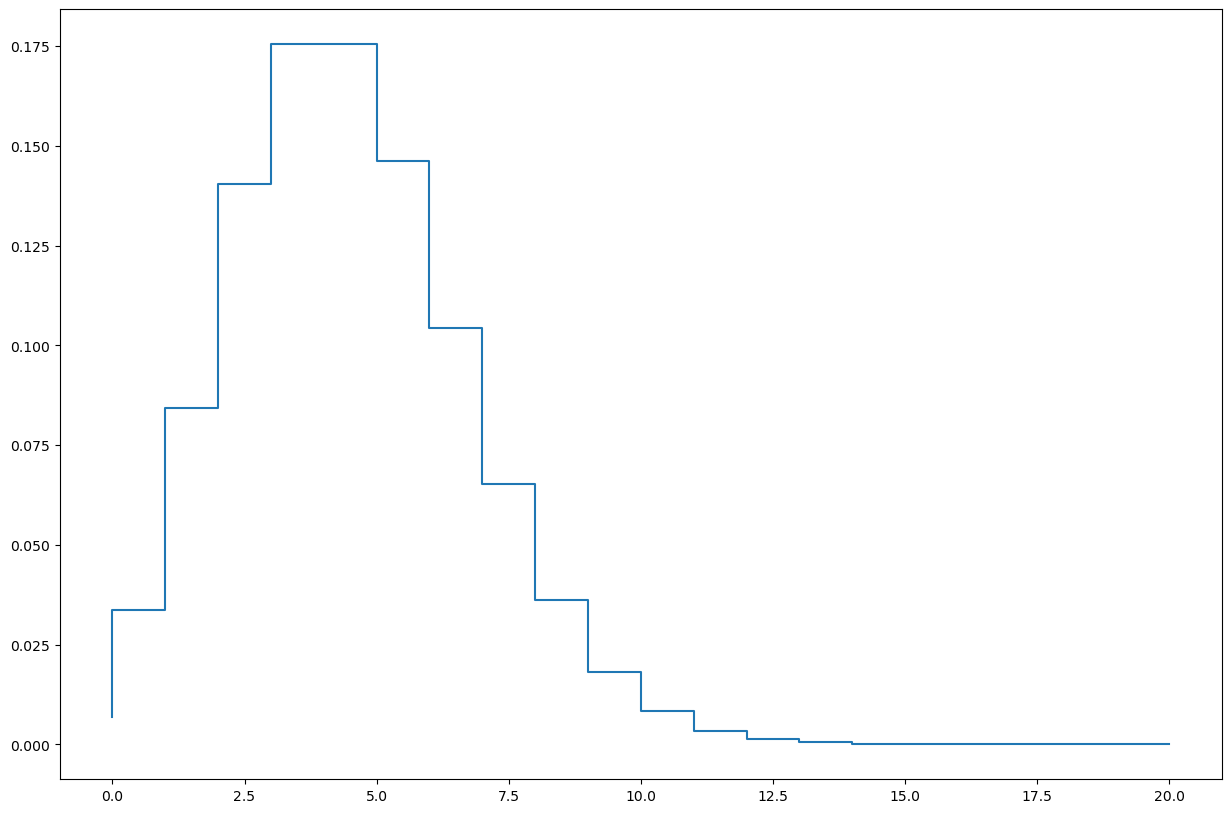

In [95]:
fig, ax = plt.subplots()
n = 20
mu = 5
loc = 0
r_value = list(range(n+1))
dist = [stats.poisson.pmf(r, mu,loc) for r in r_value]
#print(dist)
plt.step(r_value, dist)

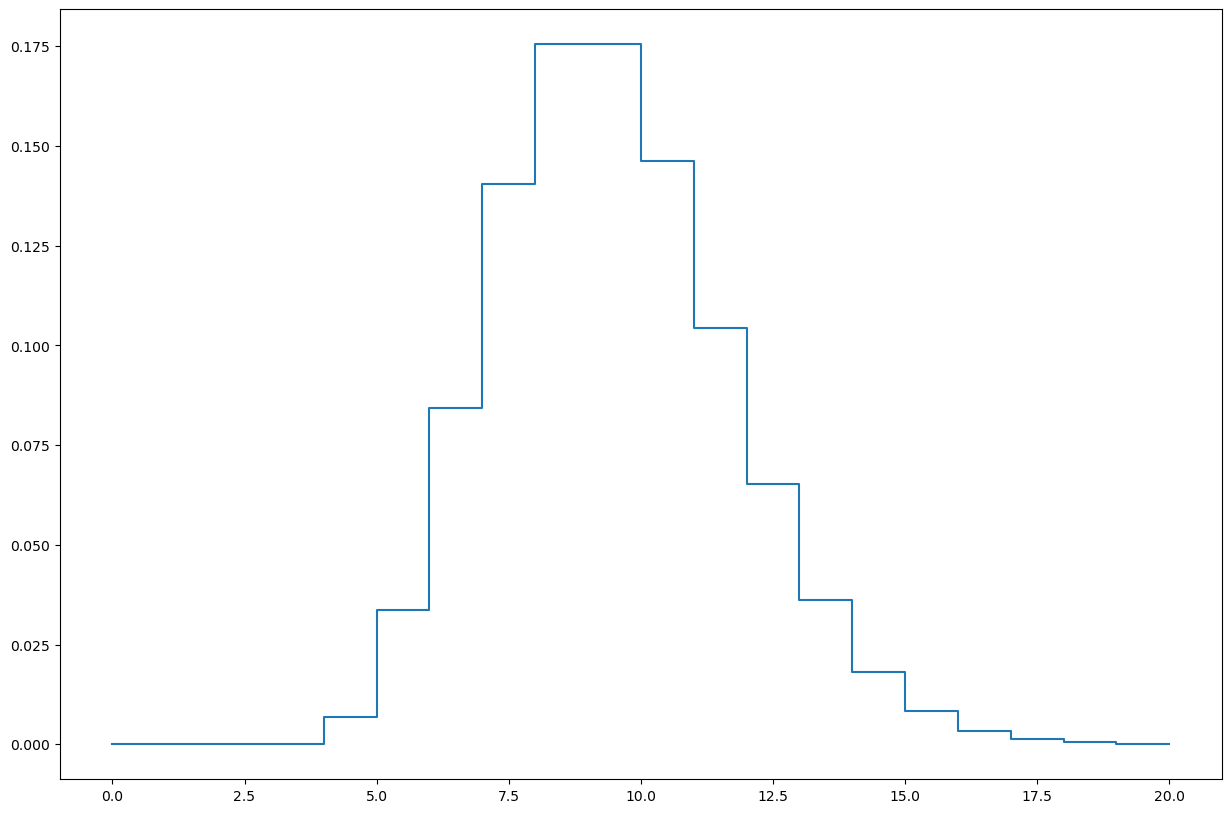

In [101]:
fig, ax = plt.subplots()
n = 20
mu = 5
loc = 5
r_value = list(range(n+1))
dist = [stats.poisson.pmf(r, mu,loc) for r in r_value]
#print(dist)
plt.step(r_value, dist)

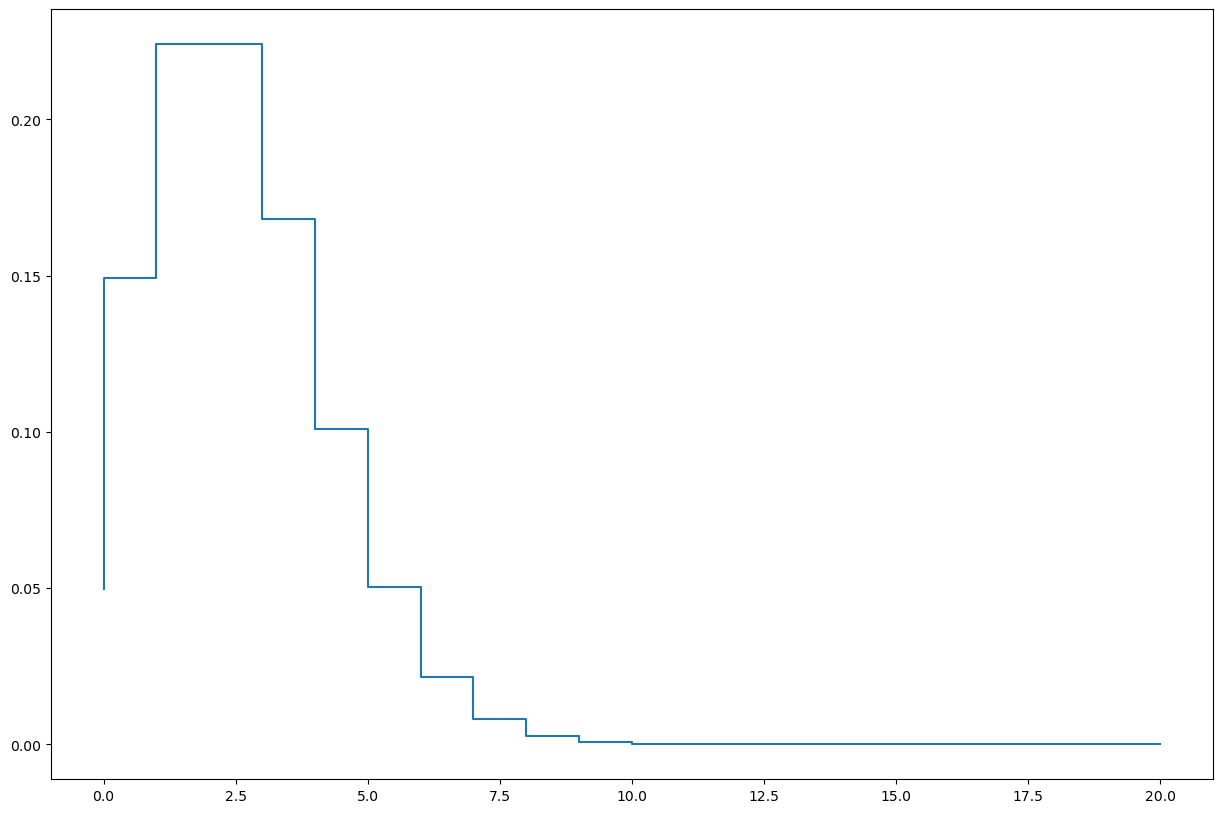

In [3]:
fig, ax = plt.subplots()

n = 20
mu = 3
loc = 0
r_value = list(range(n+1))
dist = [stats.poisson.pmf(r, mu, loc) for r in r_value]
#print(dist)
plt.step(r_value, dist)

#### features

there are three variables, mu, loc, and n.
1. loc is baseically the place where the plot starts;
2. mu is the peak location. If loc is not 0, then the peak location would be mu + loc
3. n means there are nth turns of numbers


#### hypothetical question
In a soccer game, what is the probability that goals are greater or equal to 2 in a Poisson distribution start at 0 and peak at 2

In [36]:
p_value = stats.poisson.cdf(2.,2)
z_value = stats.norm.ppf(p_value)
print(z_value,p_value)

0.45842495327867266 0.6766764161830634


#### Because the distributions are discrete, so are the probabilities and 'sigmas'？

The probabilities are the under areas of the curve or the integral of the curve, and there are a lot of 'make up' areas in poisson distribution. Therefore, the probabilities and sigmas are not accurate, and they would be greater than it actually is.

#### E. While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.

It is true that it is impossible to get a float type score as a result for some case, such as soccer game. However, those made up parameters could be float type, where made up means the parameters are calculated from real data, because those parameters are used to help our better analysis the result, like standard deviation and mean.